# **Supervised Learning - Linear Regression**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.style.use('seaborn')

<ipython-input-5-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
# Dataset Generation
def generateData(n):
  X = np.random.randn(n)*10
  b = np.random.rand(n)
  y = 3*X + 1 + 5*b
  return X,y

In [7]:
X,y = generateData(100)

In [8]:
print(X.shape, y.shape)

(100,) (100,)


In [9]:
def plotData(X,y,color='red',title='Dataset'):
  plt.title(title)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.scatter(X,y,color=color)
  plt.show

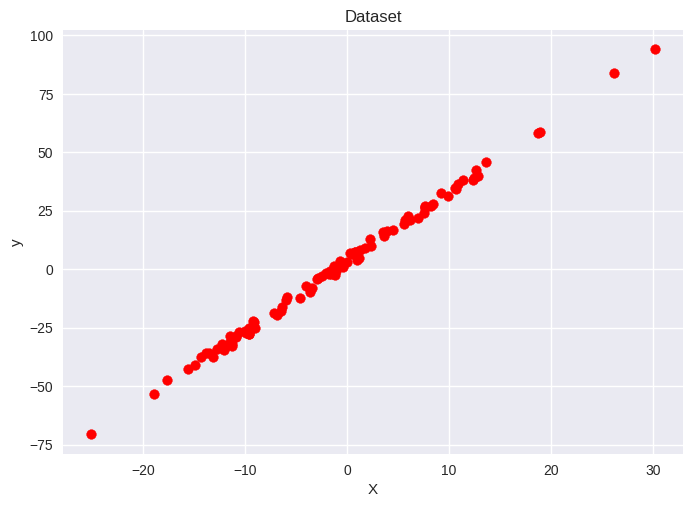

In [ ]:
plotData(X,y)

In [10]:
# Data Normalization
def normalize(X):
  X = (X - np.mean(X))/np.std(X)
  return X

def normalizeData(X):
  X = (X - X.mean())/X.std()
  return X

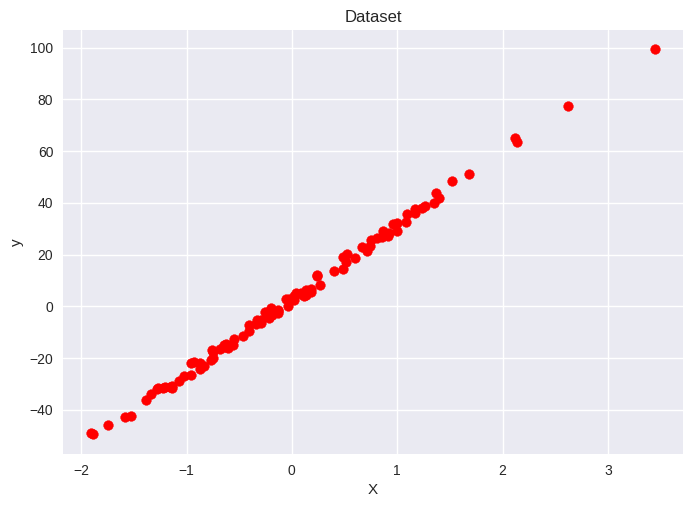

In [11]:
X = normalize(X)
plotData(X,y)

In [12]:
X.shape[0]

100

In [13]:
# Train-Test Split ( 70% - 30%)
def trainTest(X,y, split=0.7):
  n = X.shape[0]
  data = np.zeros((n,2))

  data[:,0] = X
  data[:,1] = y
  np.random.shuffle(data)
  split = int(n*split)

  xT = data[:split, 0]
  yT = data[:split, 1]
  Xt = data[split:, 0]
  yt = data[split:, 1]

  return xT,yT,Xt,yt

In [14]:
XT,yT,Xt,yt = trainTest(X,y)

In [ ]:
print(XT.shape,yT.shape,Xt.shape,yt.shape)

(70,) (70,) (30,) (30,)


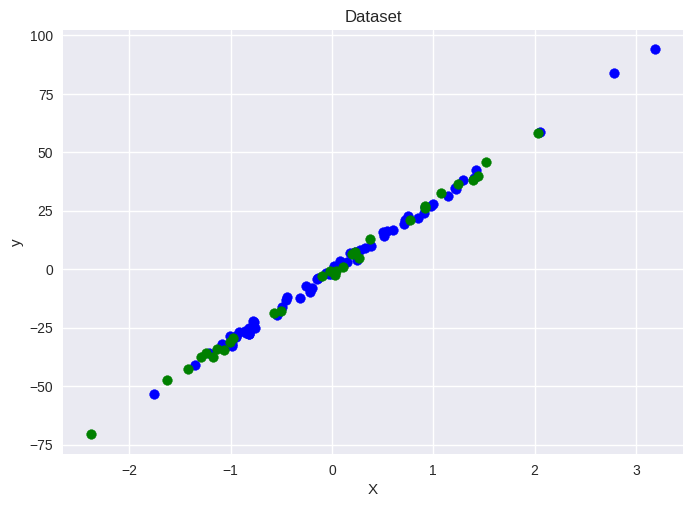

In [ ]:
plotData(XT,yT,color='blue')
plotData(Xt,yt,color='green')

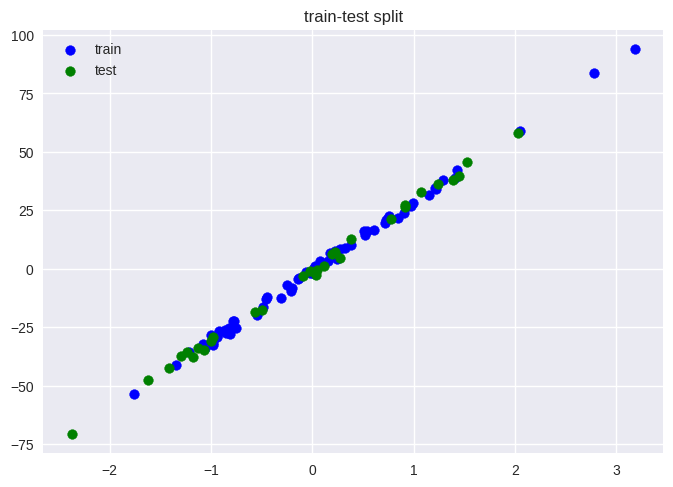

In [ ]:
plt.scatter(XT,yT,color='blue',label='train')
plt.scatter(Xt,yt,color='green',label='test')
plt.title('train-test split')
plt.legend()
plt.show()

## Linear Regression Model Development

In [ ]:
# Linear Regression : y = wX + b
def lrModel(X,w):
  return w[1]*X + w[0]

In [ ]:
def linearRegressionModel(X,w):
  return np.dot(X,w)

In [ ]:
# Mean-Square-Error (MSE)
def error(X,y,w):
  n = X.shape[0]
  e = 0
  for i in range(n):
    y_pred = lrModel(X[i],w)
    e += (y[i] - y_pred)**2

  return e/(2*n)

In [ ]:
# Gradient Descent Algorithm
def gradient(X,y,w):
  n = X.shape[0]
  grad = np.zeros((2,))

  for i in range(n):
    y_pred = lrModel(X[i],w)
    grad[0] += (y_pred - y[i])
    grad[1] += (y_pred - y[i])*X[i]

  return grad/n

In [ ]:
def train(X,y,learning_rate = 0.1, epochs = 100):
  w = np.zeros((2,))
  error_list = []

  for i in range(epochs):
    grad = gradient(X,y,w)
    error_list.append(error(X,y,w))
    w[0] = w[0] - learning_rate*grad[0]
    w[1] = w[1] - learning_rate*grad[1]

  plt.xlabel('epochs')
  plt.ylabel('error')
  plt.plot(error_list)
  plt.show()

  return w

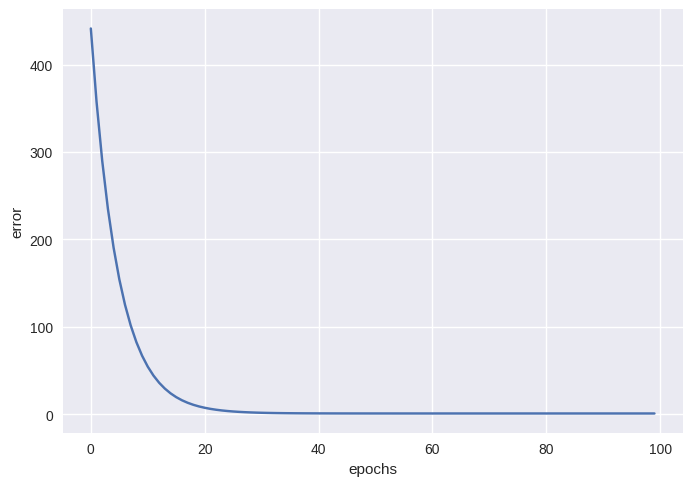

In [ ]:
w = train(X,y)

In [ ]:
w

array([-0.97900633, 29.65683652])

In [ ]:
def predict(X,w):
  return lrModel(X,w)

In [ ]:
y_pred = predict(Xt,w)

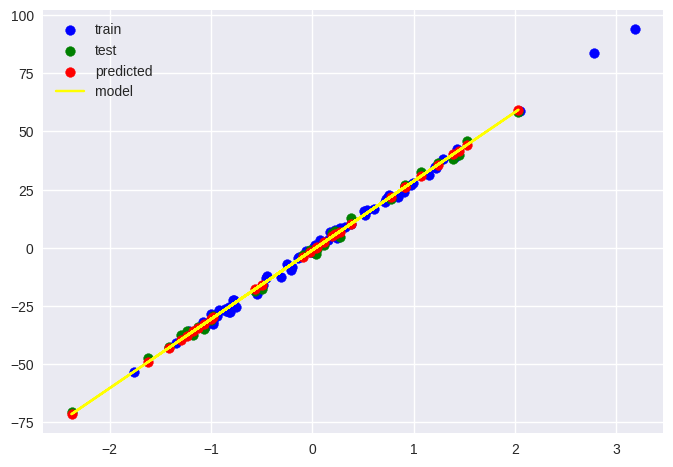

In [ ]:
plt.scatter(XT,yT,color='blue',label='train')
plt.scatter(Xt,yt,color='green',label='test')
plt.scatter(Xt,y_pred,color='red',label='predicted')
plt.plot(Xt,y_pred,color='yellow',label='model')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation using R2-Score
def r2Score(y,y_pred):
  ymean = y.mean()
  num = np.sum((y-y_pred)**2)
  den = np.sum((y-ymean)**2)
  return 1-num/den

In [ ]:
r2Score(yt,y_pred)

0.9978277521230728

# Linear Regression Model with sklearn

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
model = LinearRegression()

In [19]:
# Reshape X to be a 2D array
XT = XT.reshape(-1, 1)
Xt = Xt.reshape(-1, 1)

# Fit the model using the reshaped data
model.fit(XT, yT)

LinearRegression()

In [20]:
y_pred = model.predict(Xt)

In [21]:
y_pred.shape

(30,)

In [22]:
model.score(Xt,yt)

0.9954491093523895

In [23]:
model.intercept_

2.6441244412342986

In [24]:
model.coef_

array([28.45387734])